## Import

In [1]:
# importing the libraries
import os
import pandas as pd
import numpy as np
from itertools import chain
from IPython.display import clear_output

# for reading and displaying images
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F

# models
from src.models.model_util import load_model, save_checkpoint

# other files
from src.training.run import *
from src.data.data_util import *
from utils.kill_desktop_ini import kill_desktop_ini

# Torch
from torch.optim import *
import torch.optim as optim
from torchsummary import summary

# Maintenance
import mlflow
from DeepNotion.build import *

## Load Configurations and set Seed

In [2]:
from src.config import *
cfg = load_config('mni_config.yml')
# cfg = load_config()

random_seed = cfg.seed
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

## MLFlow Init

In [3]:
exp_name = '3dcnn_smri_comparison_test'
try:
    mlflow.create_experiment(name=exp_name)
except:
    print('Existing experiment')
    
mlflow.set_experiment(exp_name)

Existing experiment


## Tracking on Notion

In [4]:
cfg['notion']['use'] = False

### Load Preexisting page

In [6]:
if cfg['notion']['use']:
    root, client = login(cfg['notion'])
    page = root.children[-1]

### Make New Page

In [18]:
if cfg['notion']['use']:

    print(today())
    root, client = login(cfg['notion'])
    page = make_page(root)

    toggle = page.children.add_new(ToggleBlock, title='Configuration')

    print("Saving Configurations ...")
    for name, value in cfg.get_dict().items():
        if name not in ['notion']:
            txt = '**' + name + '** ' + str(value)
            print(txt)
            toggle.children.add_new(BulletedListBlock, title=txt)

#     fold_db = make_db(page, schema=cfg.schema)
#     test_db = make_db(page, schema=cfg.test_schema)

2021.02.08.20:14


## Train

### No Fold

In [4]:
#################################
### CHANGE CONFIGURATION HERE ###
#################################
cfg.model_name = 'resnet_no_maxpool'
cfg.unused_src = ['Oasis3']
# cfg.layers = [8, 16, 32, 64]
# cfg.learning_rate = 1e-5 # from checkpoint
#################################
# cfg.verbose_period = 1
cfg.refresh()
model, cfg.device = load_model(cfg.model_name, verbose=False, cfg=cfg)
print(cfg.device)

optimizer = optim.Adam(model.parameters(), lr=cfg.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

trn_dp, tst_dp = DataPacket(), DataPacket()

run_date = today().replace('.', '_').replace(':', '') + '_' + cfg.model_name
condition = 'MNI FIRST TRIAL Resnet no maxpool (ver.2021/04/15/11:06)'

# mlflow.start_run(run_name=condition)

Model Resnet_no_maxpool is selected.
cuda:0


Epoch 1 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 122.8 sec [valid] 7.4 sec 
[TRAIN]:: Loss=3408.631 Mae=56.120 Rmse=58.277 Corr=0.269 
[TEST ]:: Loss=3285.306 Mae=54.669 Rmse=57.252 Corr=0.455 


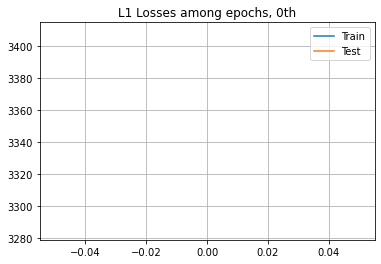

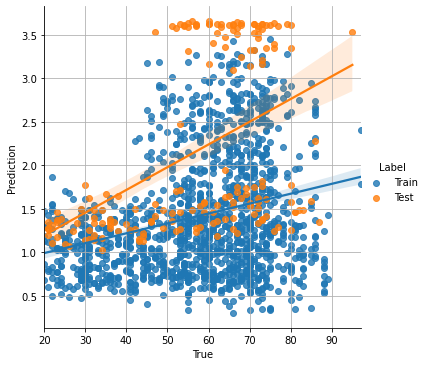

Saving ...
Epoch 2 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 108.2 sec [valid] 5.3 sec 
[TRAIN]:: Loss=3285.620 Mae=55.111 Rmse=57.212 Corr=0.545 
[TEST ]:: Loss=3495.938 Mae=56.733 Rmse=59.071 Corr=0.498 
Epoch 3 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 110.5 sec [valid] 5.3 sec 
[TRAIN]:: Loss=3191.459 Mae=54.311 Rmse=56.384 Corr=0.609 
[TEST ]:: Loss=3221.531 Mae=54.314 Rmse=56.696 Corr=0.631 
Epoch 4 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 106.3 sec [valid] 5.2 sec 
[TRAIN]:: Loss=3098.329 Mae=53.490 Rmse=55.552 Corr=0.629 
[TEST ]:: Loss=2971.205 Mae=51.915 Rmse=54.436 Corr=0.801 
Epoch 5 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 115.3 sec [valid] 5.4 sec 
[TRAIN]:: Loss=3003.019 Mae=52.632 Rmse=54.688 Corr=0.642 
[TEST ]:: Loss=2932.808 Mae=51.669 Rmse=54.086 Corr=0.781 
Epoch 6 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 107.2 sec [valid] 5.2 sec 
[TRAIN]:: Loss=2906.009 Mae=51.747 Rmse=53.793 Corr=0.652 
[TEST ]:: Loss=2828.473 Mae=50.732 Rmse=53.115 Corr=0.792 


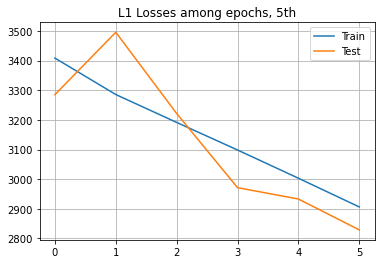

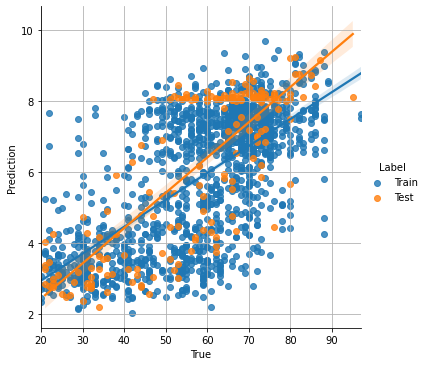

Saving ...
Epoch 7 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 107.0 sec [valid] 5.2 sec 
[TRAIN]:: Loss=2808.217 Mae=50.836 Rmse=52.877 Corr=0.658 
[TEST ]:: Loss=2575.286 Mae=47.755 Rmse=50.665 Corr=0.580 
Epoch 8 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 106.5 sec [valid] 5.2 sec 
[TRAIN]:: Loss=2707.808 Mae=49.899 Rmse=51.918 Corr=0.676 
[TEST ]:: Loss=2478.885 Mae=46.856 Rmse=49.708 Corr=0.689 
Epoch 9 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 108.4 sec [valid] 5.2 sec 
[TRAIN]:: Loss=2603.451 Mae=48.909 Rmse=50.903 Corr=0.692 
[TEST ]:: Loss=2411.748 Mae=46.371 Rmse=49.034 Corr=0.783 
Epoch 10 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 110.0 sec [valid] 5.5 sec 
[TRAIN]:: Loss=2495.525 Mae=47.868 Rmse=49.831 Corr=0.709 
[TEST ]:: Loss=2210.689 Mae=43.580 Rmse=46.927 Corr=0.032 
Epoch 11 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 110.0 sec [valid] 5.3 sec 
[TRAIN]:: Loss=2381.719 Mae=46.749 Rmse=48.675 Corr=0.724 
[TEST ]:: Loss=2319.701 Mae=45.777 Rmse=48.096 Corr=0.824 


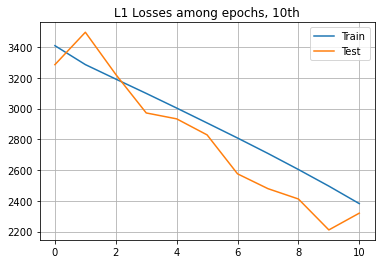

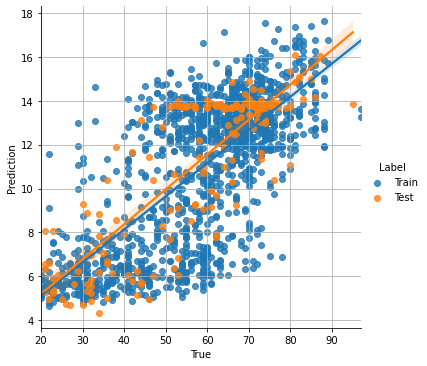

Saving ...
Epoch 12 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 110.5 sec [valid] 5.3 sec 
[TRAIN]:: Loss=2266.722 Mae=45.582 Rmse=47.479 Corr=0.734 
[TEST ]:: Loss=1952.211 Mae=40.523 Rmse=44.090 Corr=0.094 
Epoch 13 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 109.0 sec [valid] 5.4 sec 
[TRAIN]:: Loss=2151.469 Mae=44.384 Rmse=46.249 Corr=0.743 
[TEST ]:: Loss=2132.405 Mae=43.972 Rmse=46.115 Corr=0.817 
Epoch 14 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 110.0 sec [valid] 5.2 sec 
[TRAIN]:: Loss=2039.183 Mae=43.177 Rmse=45.019 Corr=0.748 
[TEST ]:: Loss=2139.789 Mae=44.178 Rmse=46.197 Corr=0.772 
Epoch 15 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 109.3 sec [valid] 5.6 sec 
[TRAIN]:: Loss=1926.540 Mae=41.939 Rmse=43.750 Corr=0.758 
[TEST ]:: Loss=1626.205 Mae=36.430 Rmse=40.232 Corr=0.543 
Epoch 16 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 108.2 sec [valid] 5.2 sec 
[TRAIN]:: Loss=1815.919 Mae=40.699 Rmse=42.467 Corr=0.771 
[TEST ]:: Loss=1645.373 Mae=37.774 Rmse=40.490 Corr=0.796 


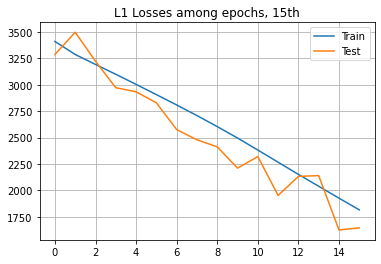

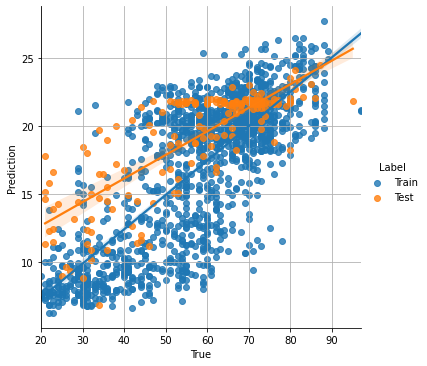

Saving ...
Epoch 17 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 106.7 sec [valid] 5.2 sec 
[TRAIN]:: Loss=1706.233 Mae=39.417 Rmse=41.154 Corr=0.779 
[TEST ]:: Loss=1895.396 Mae=41.536 Rmse=43.472 Corr=0.764 
Epoch 18 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 108.1 sec [valid] 5.2 sec 
[TRAIN]:: Loss=1601.855 Mae=38.145 Rmse=39.866 Corr=0.783 
[TEST ]:: Loss=1475.705 Mae=36.285 Rmse=38.339 Corr=0.842 
Epoch 19 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 106.6 sec [valid] 5.2 sec 
[TRAIN]:: Loss=1501.983 Mae=36.904 Rmse=38.592 Corr=0.793 
[TEST ]:: Loss=1234.691 Mae=31.859 Rmse=35.056 Corr=0.766 
Epoch 20 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 112.0 sec [valid] 5.2 sec 
[TRAIN]:: Loss=1401.984 Mae=35.615 Rmse=37.274 Corr=0.802 
[TEST ]:: Loss=1192.749 Mae=31.734 Rmse=34.460 Corr=0.800 
Epoch 21 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 108.4 sec [valid] 5.2 sec 
[TRAIN]:: Loss=1308.410 Mae=34.383 Rmse=35.996 Corr=0.814 
[TEST ]:: Loss=1393.477 Mae=35.591 Rmse=37.265 Corr=0.819 


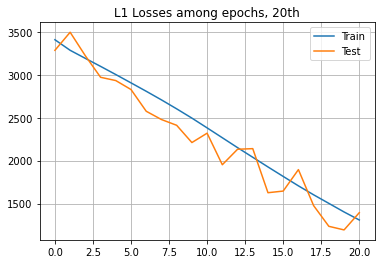

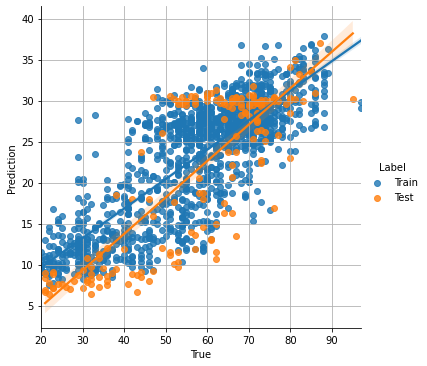

Saving ...
Epoch 22 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 106.7 sec [valid] 5.2 sec 
[TRAIN]:: Loss=1211.740 Mae=33.048 Rmse=34.627 Corr=0.822 
[TEST ]:: Loss=1137.502 Mae=31.887 Rmse=33.657 Corr=0.855 
Epoch 23 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 106.9 sec [valid] 5.3 sec 
[TRAIN]:: Loss=1119.942 Mae=31.746 Rmse=33.277 Corr=0.833 
[TEST ]:: Loss=1348.104 Mae=34.944 Rmse=36.651 Corr=0.792 
Epoch 24 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 107.7 sec [valid] 5.2 sec 
[TRAIN]:: Loss=1034.717 Mae=30.446 Rmse=31.969 Corr=0.837 
[TEST ]:: Loss=1131.692 Mae=31.967 Rmse=33.574 Corr=0.829 
Epoch 25 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 108.4 sec [valid] 5.4 sec 
[TRAIN]:: Loss=952.860 Mae=29.209 Rmse=30.662 Corr=0.850 
[TEST ]:: Loss=893.334 Mae=28.207 Rmse=29.807 Corr=0.869 
Epoch 26 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 109.0 sec [valid] 5.2 sec 
[TRAIN]:: Loss=871.365 Mae=27.892 Rmse=29.300 Corr=0.860 
[TEST ]:: Loss=787.978 Mae=26.212 Rmse=27.985 Corr=0.845 


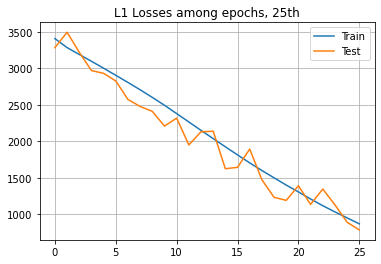

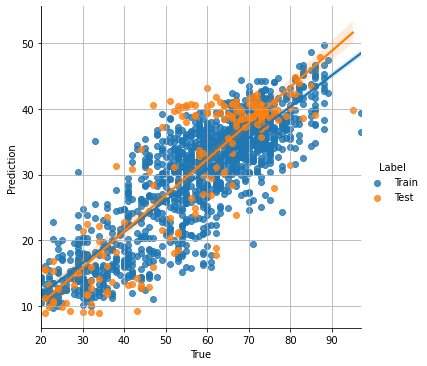

Saving ...
Epoch 27 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 107.9 sec [valid] 5.2 sec 
[TRAIN]:: Loss=795.581 Mae=26.590 Rmse=27.976 Corr=0.865 
[TEST ]:: Loss=583.910 Mae=21.258 Rmse=24.059 Corr=0.801 
Epoch 28 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 107.8 sec [valid] 5.2 sec 
[TRAIN]:: Loss=726.383 Mae=25.343 Rmse=26.718 Corr=0.867 
[TEST ]:: Loss=525.133 Mae=19.792 Rmse=22.798 Corr=0.741 
Epoch 29 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 111.6 sec [valid] 5.3 sec 
[TRAIN]:: Loss=656.722 Mae=24.079 Rmse=25.379 Corr=0.879 
[TEST ]:: Loss=540.112 Mae=21.021 Rmse=23.128 Corr=0.843 
Epoch 30 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 107.5 sec [valid] 5.2 sec 
[TRAIN]:: Loss=594.244 Mae=22.807 Rmse=24.113 Corr=0.879 
[TEST ]:: Loss=608.812 Mae=22.929 Rmse=24.574 Corr=0.860 
Epoch 31 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 108.1 sec [valid] 5.6 sec 
[TRAIN]:: Loss=535.449 Mae=21.602 Rmse=22.863 Corr=0.888 
[TEST ]:: Loss=724.921 Mae=24.908 Rmse=26.822 Corr=0.816 


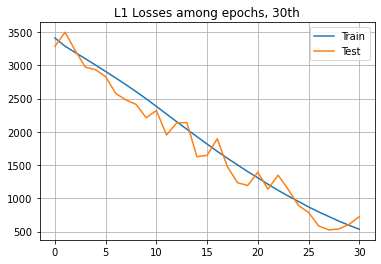

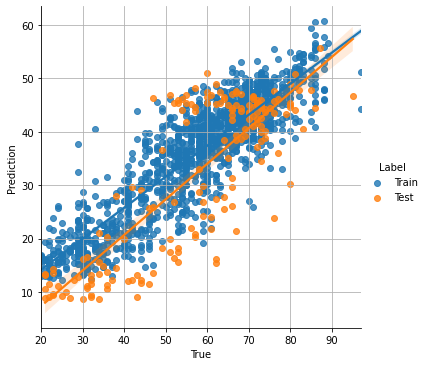

Saving ...
Epoch 32 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 107.2 sec [valid] 5.2 sec 
[TRAIN]:: Loss=482.189 Mae=20.403 Rmse=21.671 Corr=0.887 
[TEST ]:: Loss=431.060 Mae=18.368 Rmse=20.634 Corr=0.839 
Epoch 33 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 109.1 sec [valid] 5.4 sec 
[TRAIN]:: Loss=430.710 Mae=19.111 Rmse=20.446 Corr=0.885 
[TEST ]:: Loss=341.462 Mae=16.194 Rmse=18.334 Corr=0.657 
Epoch 34 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 115.5 sec [valid] 5.6 sec 
[TRAIN]:: Loss=387.274 Mae=18.078 Rmse=19.375 Corr=0.889 
[TEST ]:: Loss=266.995 Mae=14.057 Rmse=16.168 Corr=0.710 
Epoch 35 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 112.5 sec [valid] 5.3 sec 
[TRAIN]:: Loss=345.015 Mae=16.957 Rmse=18.241 Corr=0.892 
[TEST ]:: Loss=413.178 Mae=17.943 Rmse=20.202 Corr=0.832 
Epoch 36 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 112.0 sec [valid] 5.6 sec 
[TRAIN]:: Loss=304.909 Mae=15.861 Rmse=17.104 Corr=0.897 
[TEST ]:: Loss=424.807 Mae=18.401 Rmse=20.507 Corr=0.845 


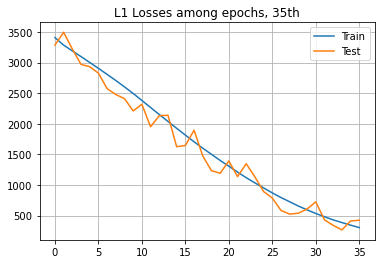

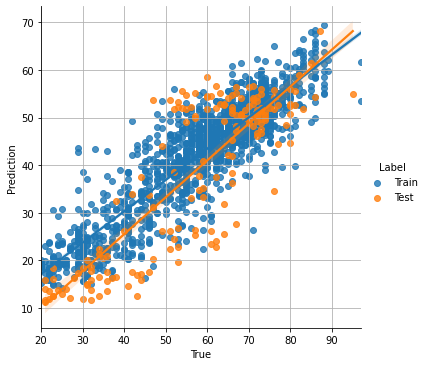

Saving ...
Epoch 37 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 116.8 sec [valid] 5.3 sec 
[TRAIN]:: Loss=268.239 Mae=14.798 Rmse=16.013 Corr=0.906 
[TEST ]:: Loss=451.764 Mae=19.146 Rmse=21.149 Corr=0.850 
Epoch 38 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 106.9 sec [valid] 5.2 sec 
[TRAIN]:: Loss=237.375 Mae=13.774 Rmse=15.017 Corr=0.900 
[TEST ]:: Loss=281.469 Mae=14.314 Rmse=16.628 Corr=0.819 
Epoch 39 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 107.6 sec [valid] 5.3 sec 
[TRAIN]:: Loss=208.830 Mae=12.827 Rmse=14.068 Corr=0.902 
[TEST ]:: Loss=172.427 Mae=11.043 Rmse=12.995 Corr=0.813 
Epoch 40 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 109.3 sec [valid] 5.3 sec 
[TRAIN]:: Loss=182.615 Mae=11.886 Rmse=13.086 Corr=0.907 
[TEST ]:: Loss=140.848 Mae=9.963 Rmse=11.719 Corr=0.822 
Epoch 41 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 111.9 sec [valid] 5.4 sec 
[TRAIN]:: Loss=159.345 Mae=11.036 Rmse=12.198 Corr=0.909 
[TEST ]:: Loss=138.545 Mae=9.917 Rmse=11.675 Corr=0.816 


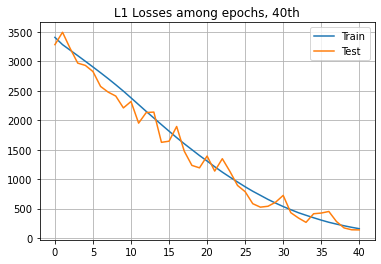

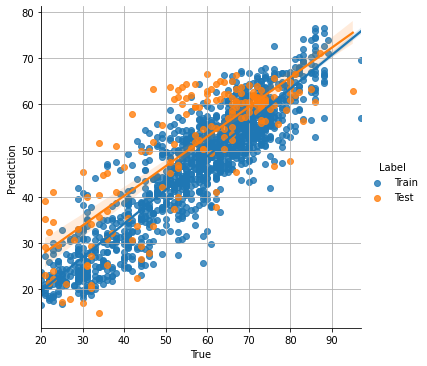

Saving ...
Epoch 42 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 119.4 sec [valid] 5.8 sec 
[TRAIN]:: Loss=143.430 Mae=10.381 Rmse=11.527 Corr=0.907 
[TEST ]:: Loss=217.830 Mae=12.473 Rmse=14.589 Corr=0.838 
Epoch 43 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 114.2 sec [valid] 5.8 sec 
[TRAIN]:: Loss=124.717 Mae=9.565 Rmse=10.695 Corr=0.910 
[TEST ]:: Loss=196.379 Mae=11.887 Rmse=13.864 Corr=0.834 
Epoch 44 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 116.4 sec [valid] 5.5 sec 
[TRAIN]:: Loss=113.202 Mae=8.991 Rmse=10.200 Corr=0.905 
[TEST ]:: Loss=149.557 Mae=9.930 Rmse=12.012 Corr=0.878 
Epoch 45 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 114.5 sec [valid] 5.6 sec 
Saving ...
[TRAIN]:: Loss=97.286 Mae=8.250 Rmse=9.456 Corr=0.913 
[TEST ]:: Loss=92.004 Mae=7.921 Rmse=9.525 Corr=0.862 
Epoch 46 / 100 | BEST MAE 7.921 | LR 0.0001
[train] 112.4 sec [valid] 6.0 sec 
[TRAIN]:: Loss=86.960 Mae=7.650 Rmse=8.899 Corr=0.912 
[TEST ]:: Loss=223.533 Mae=12.679 Rmse=14.838 Corr=0.862 


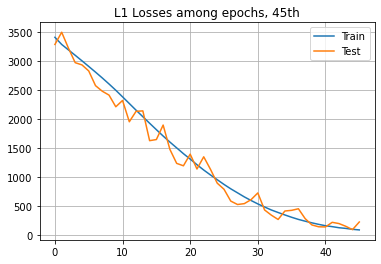

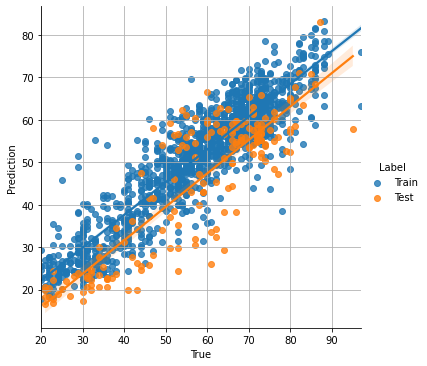

Saving ...
Epoch 47 / 100 | BEST MAE 7.921 | LR 0.0001
[train] 116.3 sec [valid] 5.9 sec 
[TRAIN]:: Loss=78.271 Mae=7.234 Rmse=8.469 Corr=0.912 
[TEST ]:: Loss=181.397 Mae=11.278 Rmse=13.334 Corr=0.882 
Epoch 48 / 100 | BEST MAE 7.921 | LR 0.0001
[train] 113.3 sec [valid] 5.6 sec 
[TRAIN]:: Loss=72.367 Mae=6.907 Rmse=8.132 Corr=0.912 
[TEST ]:: Loss=220.386 Mae=12.282 Rmse=14.685 Corr=0.835 
Epoch 49 / 100 | BEST MAE 7.921 | LR 0.0001
[train] 112.6 sec [valid] 5.6 sec 
[TRAIN]:: Loss=62.347 Mae=6.341 Rmse=7.525 Corr=0.919 
[TEST ]:: Loss=138.187 Mae=9.669 Rmse=11.620 Corr=0.878 
Epoch 50 / 100 | BEST MAE 7.921 | LR 0.0001
[train] 115.8 sec [valid] 5.5 sec 
[TRAIN]:: Loss=59.040 Mae=6.127 Rmse=7.378 Corr=0.917 
[TEST ]:: Loss=157.111 Mae=10.491 Rmse=12.403 Corr=0.880 
Epoch 51 / 100 | BEST MAE 7.921 | LR 0.0001
[train] 113.7 sec [valid] 6.2 sec 
[TRAIN]:: Loss=53.418 Mae=5.790 Rmse=6.993 Corr=0.919 
[TEST ]:: Loss=153.108 Mae=10.042 Rmse=12.236 Corr=0.856 


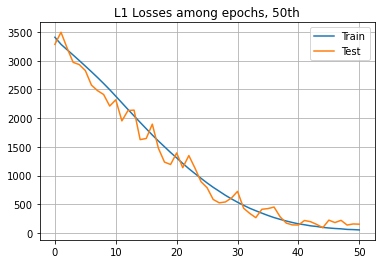

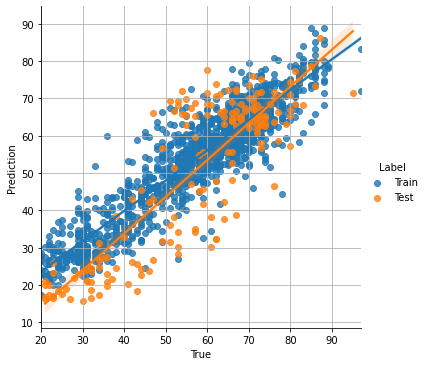

Saving ...
Epoch 52 / 100 | BEST MAE 7.921 | LR 0.0001
[train] 111.9 sec [valid] 5.3 sec 
[TRAIN]:: Loss=51.510 Mae=5.568 Rmse=6.853 Corr=0.917 
[TEST ]:: Loss=141.697 Mae=9.599 Rmse=11.775 Corr=0.855 
Epoch 53 / 100 | BEST MAE 7.921 | LR 0.0001
[train] 108.4 sec [valid] 5.2 sec 
[TRAIN]:: Loss=49.969 Mae=5.482 Rmse=6.795 Corr=0.916 
[TEST ]:: Loss=224.483 Mae=12.390 Rmse=14.845 Corr=0.816 
Epoch 54 / 100 | BEST MAE 7.921 | LR 0.0001
[train] 106.0 sec [valid] 5.2 sec 
[TRAIN]:: Loss=44.347 Mae=5.133 Rmse=6.389 Corr=0.924 
[TEST ]:: Loss=361.253 Mae=16.030 Rmse=18.860 Corr=0.781 
Epoch 55 / 100 | BEST MAE 7.921 | LR 0.0001
[train] 105.7 sec [valid] 5.2 sec 
[TRAIN]:: Loss=44.145 Mae=5.127 Rmse=6.387 Corr=0.921 
[TEST ]:: Loss=111.158 Mae=8.520 Rmse=10.455 Corr=0.871 
Epoch 56 / 100 | BEST MAE 7.921 | LR 0.0001
[train] 106.1 sec [valid] 5.1 sec 
[TRAIN]:: Loss=44.192 Mae=5.141 Rmse=6.409 Corr=0.919 
[TEST ]:: Loss=255.327 Mae=13.484 Rmse=15.865 Corr=0.835 


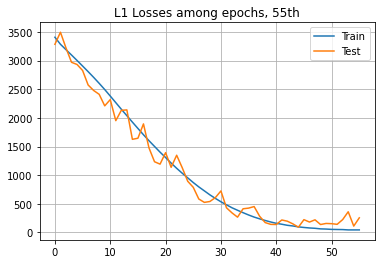

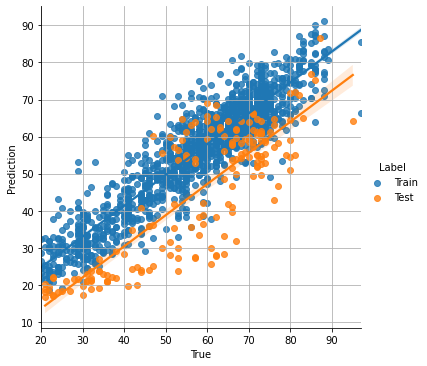

Saving ...
Epoch 57 / 100 | BEST MAE 7.921 | LR 1e-05
[train] 107.4 sec [valid] 5.2 sec 
Saving ...
[TRAIN]:: Loss=39.904 Mae=4.808 Rmse=6.031 Corr=0.926 
[TEST ]:: Loss=69.297 Mae=6.598 Rmse=8.221 Corr=0.884 
Epoch 58 / 100 | BEST MAE 6.598 | LR 1e-05
[train] 106.5 sec [valid] 5.2 sec 
[TRAIN]:: Loss=38.711 Mae=4.740 Rmse=5.950 Corr=0.928 
[TEST ]:: Loss=70.680 Mae=6.650 Rmse=8.297 Corr=0.884 
Epoch 59 / 100 | BEST MAE 6.598 | LR 1e-05
[train] 107.0 sec [valid] 5.3 sec 
Saving ...
[TRAIN]:: Loss=36.212 Mae=4.651 Rmse=5.772 Corr=0.933 
[TEST ]:: Loss=69.228 Mae=6.590 Rmse=8.200 Corr=0.884 
Epoch 60 / 100 | BEST MAE 6.590 | LR 1e-05
[train] 107.4 sec [valid] 5.2 sec 
Saving ...
[TRAIN]:: Loss=37.986 Mae=4.658 Rmse=5.896 Corr=0.929 
[TEST ]:: Loss=68.315 Mae=6.497 Rmse=8.140 Corr=0.886 
Epoch 61 / 100 | BEST MAE 6.497 | LR 1e-05
[train] 111.8 sec [valid] 5.3 sec 
Saving ...
[TRAIN]:: Loss=37.498 Mae=4.631 Rmse=5.856 Corr=0.930 
[TEST ]:: Loss=67.441 Mae=6.484 Rmse=8.098 Corr=0.888 


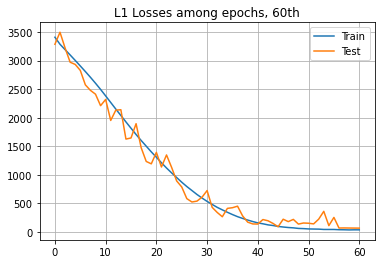

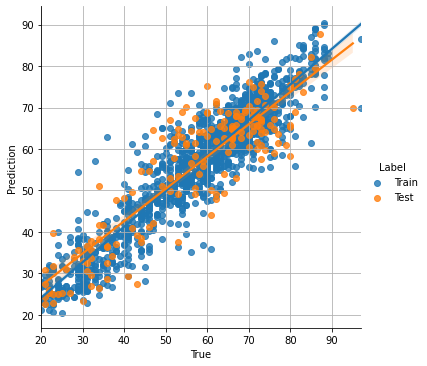

Saving ...
Epoch 62 / 100 | BEST MAE 6.484 | LR 1e-05
[train] 112.5 sec [valid] 5.6 sec 
[TRAIN]:: Loss=36.991 Mae=4.608 Rmse=5.820 Corr=0.931 
[TEST ]:: Loss=68.300 Mae=6.492 Rmse=8.147 Corr=0.886 
Epoch 63 / 100 | BEST MAE 6.484 | LR 1e-05
[train] 112.3 sec [valid] 5.5 sec 
[TRAIN]:: Loss=37.107 Mae=4.592 Rmse=5.828 Corr=0.931 
[TEST ]:: Loss=68.101 Mae=6.512 Rmse=8.130 Corr=0.887 
Epoch 64 / 100 | BEST MAE 6.484 | LR 1e-05
[train] 109.3 sec [valid] 5.4 sec 
[TRAIN]:: Loss=36.080 Mae=4.588 Rmse=5.743 Corr=0.932 
[TEST ]:: Loss=68.497 Mae=6.497 Rmse=8.157 Corr=0.886 
Epoch 65 / 100 | BEST MAE 6.484 | LR 1e-05
[train] 110.0 sec [valid] 5.9 sec 
[TRAIN]:: Loss=36.205 Mae=4.658 Rmse=5.767 Corr=0.932 
[TEST ]:: Loss=68.649 Mae=6.535 Rmse=8.180 Corr=0.885 
Epoch 66 / 100 | BEST MAE 6.484 | LR 1e-05
[train] 111.0 sec [valid] 5.7 sec 
[TRAIN]:: Loss=34.521 Mae=4.484 Rmse=5.607 Corr=0.935 
[TEST ]:: Loss=68.780 Mae=6.533 Rmse=8.194 Corr=0.886 


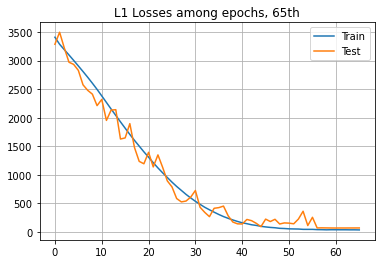

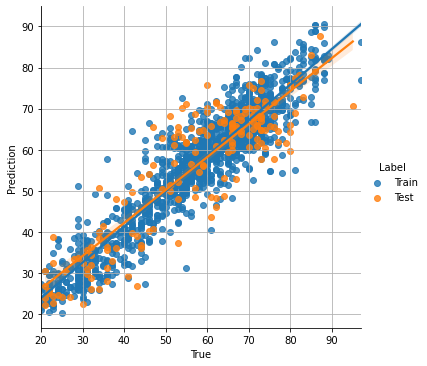

Saving ...
Epoch 67 / 100 | BEST MAE 6.484 | LR 1e-05
[train] 112.1 sec [valid] 5.8 sec 
[TRAIN]:: Loss=37.012 Mae=4.643 Rmse=5.794 Corr=0.930 
[TEST ]:: Loss=68.167 Mae=6.529 Rmse=8.126 Corr=0.887 
Epoch 68 / 100 | BEST MAE 6.484 | LR 1e-05
[train] 114.8 sec [valid] 5.7 sec 
[TRAIN]:: Loss=35.513 Mae=4.508 Rmse=5.686 Corr=0.933 
[TEST ]:: Loss=68.546 Mae=6.526 Rmse=8.177 Corr=0.886 
Epoch 69 / 100 | BEST MAE 6.484 | LR 1e-05
[train] 111.7 sec [valid] 6.1 sec 
Saving ...
[TRAIN]:: Loss=35.751 Mae=4.564 Rmse=5.711 Corr=0.933 
[TEST ]:: Loss=67.281 Mae=6.477 Rmse=8.081 Corr=0.887 
Epoch 70 / 100 | BEST MAE 6.477 | LR 1e-05
[train] 110.1 sec [valid] 5.2 sec 
Saving ...
[TRAIN]:: Loss=35.375 Mae=4.572 Rmse=5.686 Corr=0.934 
[TEST ]:: Loss=67.159 Mae=6.443 Rmse=8.069 Corr=0.888 
Epoch 71 / 100 | BEST MAE 6.443 | LR 1e-05
[train] 111.5 sec [valid] 5.3 sec 
[TRAIN]:: Loss=34.116 Mae=4.485 Rmse=5.574 Corr=0.936 
[TEST ]:: Loss=67.518 Mae=6.478 Rmse=8.106 Corr=0.886 


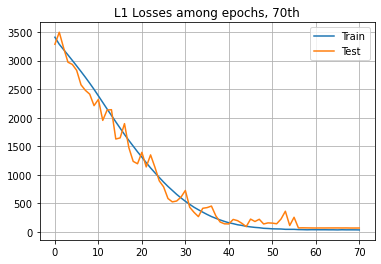

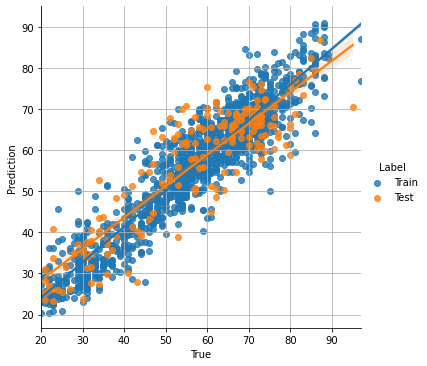

Saving ...
Epoch 72 / 100 | BEST MAE 6.443 | LR 1e-05
[train] 111.1 sec [valid] 5.5 sec 
[TRAIN]:: Loss=35.635 Mae=4.555 Rmse=5.701 Corr=0.933 
[TEST ]:: Loss=67.386 Mae=6.461 Rmse=8.087 Corr=0.887 
Epoch 73 / 100 | BEST MAE 6.443 | LR 1e-05
[train] 111.0 sec [valid] 5.4 sec 
[TRAIN]:: Loss=35.648 Mae=4.546 Rmse=5.696 Corr=0.933 
[TEST ]:: Loss=69.979 Mae=6.670 Rmse=8.248 Corr=0.884 
Epoch 74 / 100 | BEST MAE 6.443 | LR 1e-05
[train] 106.1 sec [valid] 5.2 sec 
[TRAIN]:: Loss=34.662 Mae=4.515 Rmse=5.651 Corr=0.934 
[TEST ]:: Loss=67.450 Mae=6.464 Rmse=8.111 Corr=0.886 
Epoch 75 / 100 | BEST MAE 6.443 | LR 1e-05
[train] 106.2 sec [valid] 5.2 sec 
[TRAIN]:: Loss=33.565 Mae=4.461 Rmse=5.525 Corr=0.936 
[TEST ]:: Loss=68.034 Mae=6.479 Rmse=8.125 Corr=0.886 
Epoch 76 / 100 | BEST MAE 6.443 | LR 1e-05
[train] 109.1 sec [valid] 5.2 sec 
Saving ...
[TRAIN]:: Loss=33.205 Mae=4.460 Rmse=5.507 Corr=0.937 
[TEST ]:: Loss=66.856 Mae=6.402 Rmse=8.048 Corr=0.888 


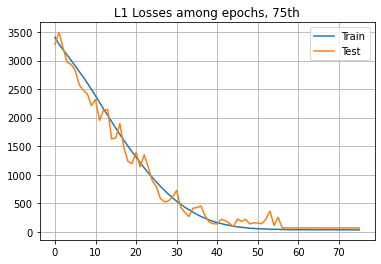

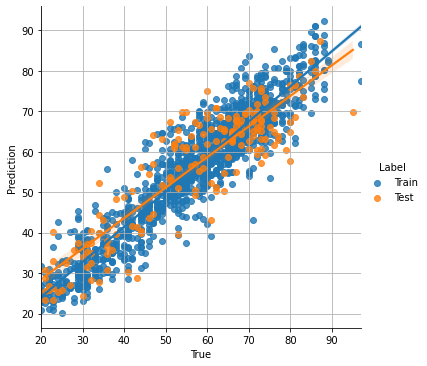

Saving ...
Epoch 77 / 100 | BEST MAE 6.402 | LR 1e-05
[train] 110.7 sec [valid] 5.5 sec 
[TRAIN]:: Loss=34.434 Mae=4.456 Rmse=5.548 Corr=0.935 
[TEST ]:: Loss=67.446 Mae=6.452 Rmse=8.103 Corr=0.886 
Epoch 78 / 100 | BEST MAE 6.402 | LR 1e-05
[train] 114.0 sec [valid] 5.6 sec 
[TRAIN]:: Loss=33.761 Mae=4.429 Rmse=5.590 Corr=0.936 
[TEST ]:: Loss=66.639 Mae=6.428 Rmse=8.043 Corr=0.888 
Epoch 79 / 100 | BEST MAE 6.402 | LR 1e-05
[train] 108.8 sec [valid] 5.2 sec 
[TRAIN]:: Loss=34.134 Mae=4.477 Rmse=5.552 Corr=0.936 
[TEST ]:: Loss=68.726 Mae=6.498 Rmse=8.156 Corr=0.888 
Epoch 80 / 100 | BEST MAE 6.402 | LR 1e-05
[train] 107.5 sec [valid] 5.2 sec 
[TRAIN]:: Loss=33.578 Mae=4.445 Rmse=5.532 Corr=0.936 
[TEST ]:: Loss=67.175 Mae=6.425 Rmse=8.074 Corr=0.887 
Epoch 81 / 100 | BEST MAE 6.402 | LR 1e-05
[train] 106.8 sec [valid] 5.2 sec 
[TRAIN]:: Loss=33.647 Mae=4.384 Rmse=5.536 Corr=0.936 
[TEST ]:: Loss=67.761 Mae=6.480 Rmse=8.135 Corr=0.886 


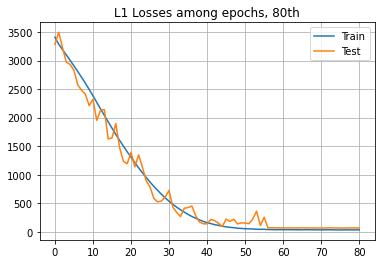

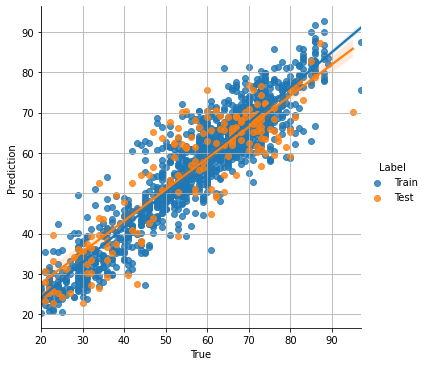

Saving ...
Epoch 82 / 100 | BEST MAE 6.402 | LR 1e-05
[train] 106.6 sec [valid] 5.2 sec 
[TRAIN]:: Loss=33.044 Mae=4.365 Rmse=5.484 Corr=0.937 
[TEST ]:: Loss=66.903 Mae=6.414 Rmse=8.059 Corr=0.888 
Epoch 83 / 100 | BEST MAE 6.402 | LR 1e-05
[train] 109.6 sec [valid] 5.2 sec 
[TRAIN]:: Loss=33.445 Mae=4.340 Rmse=5.504 Corr=0.936 
[TEST ]:: Loss=67.323 Mae=6.459 Rmse=8.095 Corr=0.887 
Epoch 84 / 100 | BEST MAE 6.402 | LR 1e-05
[train] 106.4 sec [valid] 5.2 sec 
Saving ...
[TRAIN]:: Loss=33.542 Mae=4.416 Rmse=5.533 Corr=0.936 
[TEST ]:: Loss=66.442 Mae=6.393 Rmse=8.021 Corr=0.889 
Epoch 85 / 100 | BEST MAE 6.393 | LR 1e-05
[train] 108.0 sec [valid] 5.3 sec 
[TRAIN]:: Loss=33.165 Mae=4.378 Rmse=5.479 Corr=0.937 
[TEST ]:: Loss=67.172 Mae=6.433 Rmse=8.088 Corr=0.887 
Epoch 86 / 100 | BEST MAE 6.393 | LR 1e-05
[train] 114.9 sec [valid] 5.4 sec 
[TRAIN]:: Loss=33.244 Mae=4.371 Rmse=5.479 Corr=0.936 
[TEST ]:: Loss=68.071 Mae=6.490 Rmse=8.135 Corr=0.886 


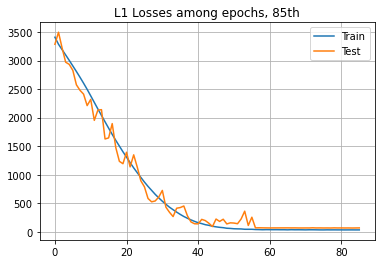

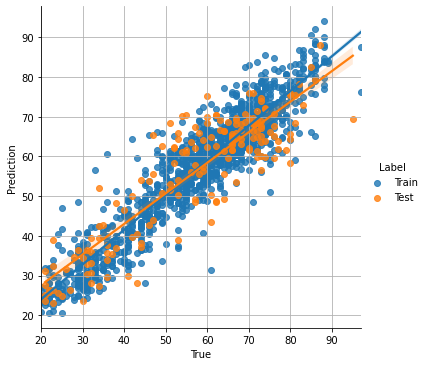

Saving ...
Epoch 87 / 100 | BEST MAE 6.393 | LR 1e-05
[train] 116.9 sec [valid] 5.6 sec 
[TRAIN]:: Loss=34.157 Mae=4.393 Rmse=5.546 Corr=0.935 
[TEST ]:: Loss=69.145 Mae=6.549 Rmse=8.224 Corr=0.883 
Epoch 88 / 100 | BEST MAE 6.393 | LR 1e-05
[train] 118.5 sec [valid] 5.9 sec 
[TRAIN]:: Loss=33.582 Mae=4.396 Rmse=5.505 Corr=0.936 
[TEST ]:: Loss=67.200 Mae=6.437 Rmse=8.103 Corr=0.887 
Epoch 89 / 100 | BEST MAE 6.393 | LR 1e-05
[train] 111.3 sec [valid] 5.4 sec 
[TRAIN]:: Loss=33.430 Mae=4.390 Rmse=5.488 Corr=0.936 
[TEST ]:: Loss=69.402 Mae=6.529 Rmse=8.248 Corr=0.883 
Epoch 90 / 100 | BEST MAE 6.393 | LR 1e-05
[train] 113.3 sec [valid] 5.8 sec 
[TRAIN]:: Loss=32.670 Mae=4.358 Rmse=5.441 Corr=0.938 
[TEST ]:: Loss=67.896 Mae=6.457 Rmse=8.134 Corr=0.885 
Epoch 91 / 100 | BEST MAE 6.393 | LR 1e-05
[train] 115.7 sec [valid] 5.4 sec 
[TRAIN]:: Loss=33.100 Mae=4.391 Rmse=5.502 Corr=0.936 
[TEST ]:: Loss=68.919 Mae=6.532 Rmse=8.207 Corr=0.883 


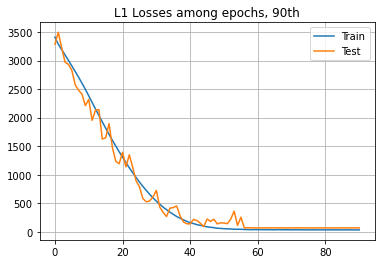

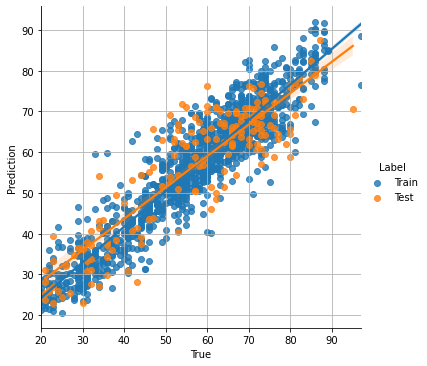

Saving ...
Epoch 92 / 100 | BEST MAE 6.393 | LR 1e-05
[train] 108.6 sec [valid] 5.3 sec 
[TRAIN]:: Loss=32.698 Mae=4.330 Rmse=5.455 Corr=0.937 
[TEST ]:: Loss=70.993 Mae=6.691 Rmse=8.313 Corr=0.882 
Epoch 93 / 100 | BEST MAE 6.393 | LR 1e-05
[train] 110.0 sec [valid] 5.4 sec 
[TRAIN]:: Loss=32.087 Mae=4.343 Rmse=5.424 Corr=0.938 
[TEST ]:: Loss=68.674 Mae=6.513 Rmse=8.197 Corr=0.884 
Epoch 94 / 100 | BEST MAE 6.393 | LR 1e-05
[train] 107.9 sec [valid] 5.3 sec 
[TRAIN]:: Loss=32.167 Mae=4.280 Rmse=5.387 Corr=0.938 
[TEST ]:: Loss=67.393 Mae=6.470 Rmse=8.097 Corr=0.886 
Epoch 95 / 100 | BEST MAE 6.393 | LR 1e-05
[train] 108.2 sec [valid] 5.3 sec 
[TRAIN]:: Loss=32.674 Mae=4.280 Rmse=5.434 Corr=0.937 
[TEST ]:: Loss=68.448 Mae=6.487 Rmse=8.176 Corr=0.885 
Epoch 96 / 100 | BEST MAE 6.393 | LR 1.0000000000000002e-06
[train] 107.6 sec [valid] 5.3 sec 
[TRAIN]:: Loss=32.430 Mae=4.259 Rmse=5.422 Corr=0.938 
[TEST ]:: Loss=68.130 Mae=6.474 Rmse=8.142 Corr=0.886 


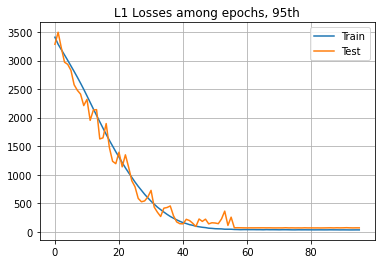

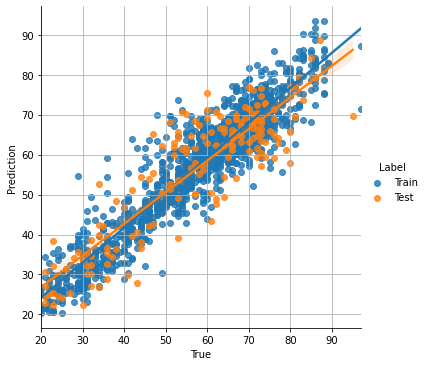

Saving ...
Epoch 97 / 100 | BEST MAE 6.393 | LR 1.0000000000000002e-06
[train] 107.7 sec [valid] 5.6 sec 
[TRAIN]:: Loss=32.131 Mae=4.309 Rmse=5.396 Corr=0.938 
[TEST ]:: Loss=67.798 Mae=6.463 Rmse=8.125 Corr=0.886 
Epoch 98 / 100 | BEST MAE 6.393 | LR 1.0000000000000002e-06
[train] 109.8 sec [valid] 5.4 sec 
[TRAIN]:: Loss=30.931 Mae=4.234 Rmse=5.278 Corr=0.941 
[TEST ]:: Loss=67.736 Mae=6.457 Rmse=8.113 Corr=0.887 
Epoch 99 / 100 | BEST MAE 6.393 | LR 1.0000000000000002e-06
[train] 107.2 sec [valid] 5.7 sec 
[TRAIN]:: Loss=32.008 Mae=4.300 Rmse=5.378 Corr=0.939 
[TEST ]:: Loss=68.167 Mae=6.481 Rmse=8.142 Corr=0.886 
Epoch 100 / 100 | BEST MAE 6.393 | LR 1.0000000000000002e-06
[train] 107.6 sec [valid] 5.3 sec 
[TRAIN]:: Loss=32.507 Mae=4.354 Rmse=5.419 Corr=0.938 
[TEST ]:: Loss=67.713 Mae=6.466 Rmse=8.118 Corr=0.886 


In [5]:
mlflow.start_run(run_name=condition)

fold = None
# cfg.epochs = 200
# db = make_db(page, client=client, schema=cfg['notion']['no_fold_aug_schema'], title='Results') if cfg['notion']['use'] else None
db = None
for e in range(cfg.epochs):

    start_time = time.time()
    print(f'Epoch {e+1} / {cfg.epochs} | BEST MAE {cfg.best_mae:.3f} | LR {optimizer.param_groups[0]["lr"]}')

    model, trn_dp, trn_res = train(model, optimizer, fn_lst, trn_dp, cfg, fold=fold, augment=True)
    model, tst_dp, tst_res = valid(model, fn_lst, tst_dp, cfg, fold=fold)

    scheduler.step(tst_dp.mae[-1])
    elapsed_time = round(time.time() - start_time, 3)

    if tst_dp.mae[-1] < cfg.best_mae:

        cfg.best_mae = tst_dp.mae[-1]
        model_name = f'{cfg.model_name}_ep{e}-{cfg.epochs}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=True)

    df = pd.concat([make_df(trn_res, 'Train'),
                    make_df(tst_res, 'Test')], ignore_index=True)

    trn_dp.corr.update(df[df['Label'] == 'Train'].corr().Prediction['True'])
    trn_dp.refresh()
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()

    if e % 1 == 0:
        trn_dp.info('train')
        tst_dp.info('test ')

    if e % cfg.verbose_period == 0:
        
        if e % 5 == 0:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(list(trn_dp.loss), label='Train')
            plt.plot(list(tst_dp.loss), label='Test')
            plt.grid(); plt.legend()

            sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()

        model_name = f'{cfg.model_name}_ep{e}-{str(cfg.epochs).zfill(3)}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=False)

        if db:
            data = gather_data(e=e, time=elapsed_time, cfg=cfg,
                            train=trn_dp, valid=tst_dp)
            write_db(db, data)

    metrics = mlflow_data(time=elapsed_time, train=trn_dp, valid=tst_dp)
    mlflow.log_metrics(metrics, e)

    torch.cuda.empty_cache()

Saving ...


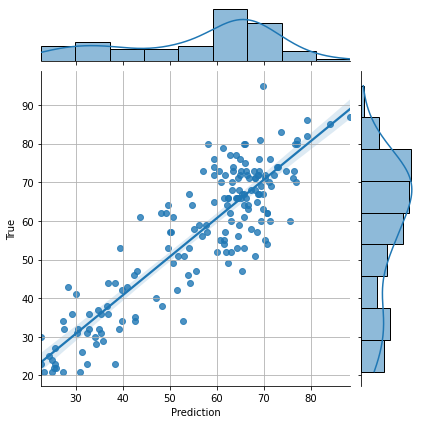

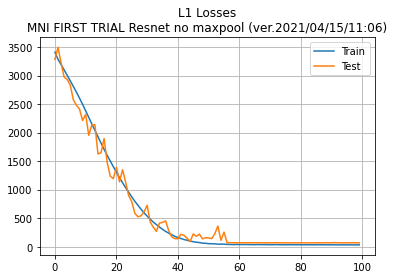

In [6]:
# Save Parameters to MLFlow
cfg.best_mae = min(tst_dp.mae)
cfg.refresh()
params = dict()
for name, value in cfg.get_dict().items():
    if name not in ['notion']:  
        params[name] = str(value)
mlflow.log_params(params)

save_checkpoint(cfg.get_dict(), 'cfg.pt', model_dir=f'./result/models/{run_date}/', is_best=True)

# Save Plots to MLFlow
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()
plt.savefig(f'./result/models/{run_date}/test_jointplot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/test_jointplot.png')
plt.close()

plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

mlflow.end_run()
kill_desktop_ini('./mlruns/')

In [6]:
import yaml
cfg.best_mae = min(tst_dp.mae)
with open(f'./result/models/{run_date}/cfg.yml', 'w') as y:
    yaml.dump(cfg.get_dict(), y, default_flow_style=False)

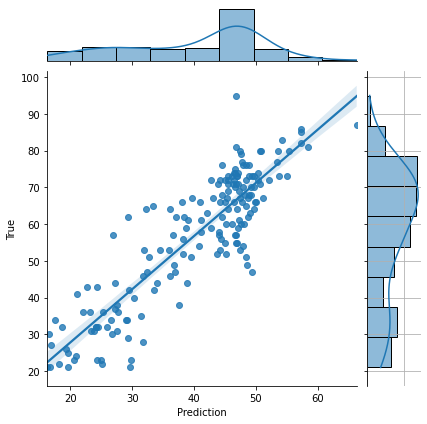

In [7]:
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()

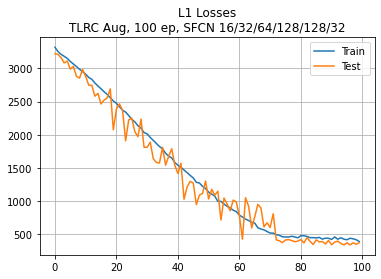

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'G:\\My Drive'

In [8]:
plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

### Unexpected stops - checkpoint

Epoch 71 / 100, BEST MAE 8.000
[train] 143.3 sec [valid] 15.6 sec 
Saving ...
[TRAIN]:: Loss=20.076 Mae=3.400 Rmse=4.153 Corr=0.962 
[TEST ]:: Loss=102.631 Mae=7.971 Rmse=10.045 Corr=0.869 


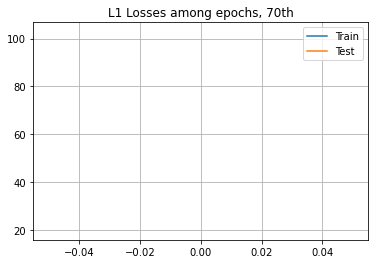

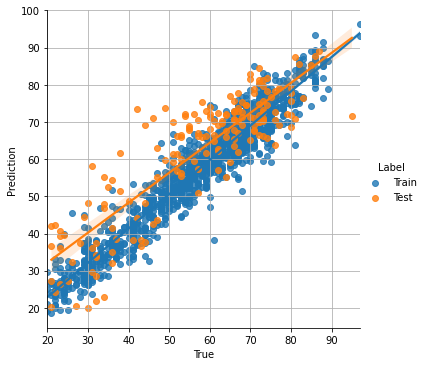

Saving ...
Epoch 72 / 100, BEST MAE 7.971
[train] 142.3 sec [valid] 17.9 sec 
Saving ...
[TRAIN]:: Loss=20.299 Mae=3.535 Rmse=4.220 Corr=0.961 
[TEST ]:: Loss=95.804 Mae=7.885 Rmse=9.686 Corr=0.877 
Epoch 73 / 100, BEST MAE 7.885
[train] 152.2 sec [valid] 15.8 sec 
Saving ...
[TRAIN]:: Loss=20.763 Mae=3.540 Rmse=4.291 Corr=0.960 
[TEST ]:: Loss=94.592 Mae=7.566 Rmse=9.668 Corr=0.866 
Epoch 74 / 100, BEST MAE 7.566
[train] 132.8 sec [valid] 16.0 sec 
[TRAIN]:: Loss=21.296 Mae=3.614 Rmse=4.354 Corr=0.959 
[TEST ]:: Loss=91.199 Mae=7.655 Rmse=9.426 Corr=0.858 
Epoch 75 / 100, BEST MAE 7.566
[train] 210.3 sec [valid] 17.1 sec 
Saving ...
[TRAIN]:: Loss=21.003 Mae=3.559 Rmse=4.307 Corr=0.960 
[TEST ]:: Loss=78.570 Mae=7.098 Rmse=8.799 Corr=0.879 
Epoch 76 / 100, BEST MAE 7.098
[train] 135.8 sec [valid] 15.6 sec 
[TRAIN]:: Loss=20.763 Mae=3.557 Rmse=4.274 Corr=0.960 
[TEST ]:: Loss=115.656 Mae=8.228 Rmse=10.678 Corr=0.838 


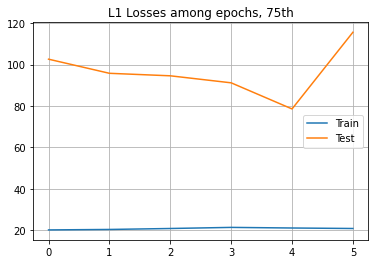

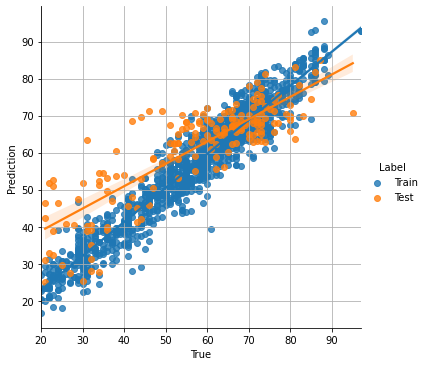

Saving ...
Epoch 77 / 100, BEST MAE 7.098
[train] 136.5 sec [valid] 15.8 sec 
Saving ...
[TRAIN]:: Loss=19.236 Mae=3.485 Rmse=4.111 Corr=0.963 
[TEST ]:: Loss=82.186 Mae=7.033 Rmse=8.960 Corr=0.869 
Epoch 78 / 100, BEST MAE 7.033
[train] 134.6 sec [valid] 15.8 sec 
[TRAIN]:: Loss=19.644 Mae=3.453 Rmse=4.187 Corr=0.962 
[TEST ]:: Loss=166.228 Mae=10.125 Rmse=12.832 Corr=0.838 
Epoch 79 / 100, BEST MAE 7.033
[train] 133.6 sec [valid] 15.7 sec 
[TRAIN]:: Loss=17.960 Mae=3.327 Rmse=3.984 Corr=0.966 
[TEST ]:: Loss=97.050 Mae=7.626 Rmse=9.773 Corr=0.868 
Epoch 80 / 100, BEST MAE 7.033
[train] 134.0 sec [valid] 15.6 sec 
Saving ...
[TRAIN]:: Loss=17.491 Mae=3.246 Rmse=3.921 Corr=0.967 
[TEST ]:: Loss=67.099 Mae=6.547 Rmse=8.090 Corr=0.888 
Epoch 81 / 100, BEST MAE 6.547
[train] 133.9 sec [valid] 15.8 sec 
Saving ...
[TRAIN]:: Loss=16.633 Mae=3.223 Rmse=3.823 Corr=0.968 
[TEST ]:: Loss=68.733 Mae=6.489 Rmse=8.153 Corr=0.887 


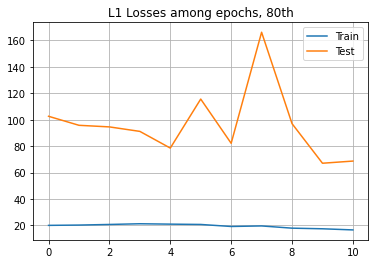

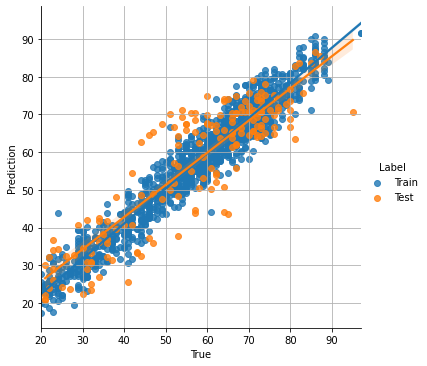

Saving ...
Epoch 82 / 100, BEST MAE 6.489
[train] 133.2 sec [valid] 15.9 sec 
[TRAIN]:: Loss=16.554 Mae=3.222 Rmse=3.822 Corr=0.968 
[TEST ]:: Loss=73.982 Mae=6.966 Rmse=8.506 Corr=0.883 
Epoch 83 / 100, BEST MAE 6.489
[train] 133.0 sec [valid] 15.7 sec 
[TRAIN]:: Loss=18.886 Mae=3.356 Rmse=4.110 Corr=0.964 
[TEST ]:: Loss=152.680 Mae=9.502 Rmse=12.279 Corr=0.832 
Epoch 84 / 100, BEST MAE 6.489
[train] 130.6 sec [valid] 15.6 sec 
[TRAIN]:: Loss=17.393 Mae=3.238 Rmse=3.933 Corr=0.967 
[TEST ]:: Loss=67.707 Mae=6.509 Rmse=8.120 Corr=0.889 
Epoch 85 / 100, BEST MAE 6.489
[train] 132.0 sec [valid] 15.6 sec 
[TRAIN]:: Loss=17.198 Mae=3.246 Rmse=3.951 Corr=0.967 
[TEST ]:: Loss=121.856 Mae=8.870 Rmse=10.928 Corr=0.882 
Epoch 86 / 100, BEST MAE 6.489
[train] 130.9 sec [valid] 15.7 sec 
Saving ...
[TRAIN]:: Loss=16.168 Mae=3.135 Rmse=3.792 Corr=0.969 
[TEST ]:: Loss=63.634 Mae=6.368 Rmse=7.829 Corr=0.894 


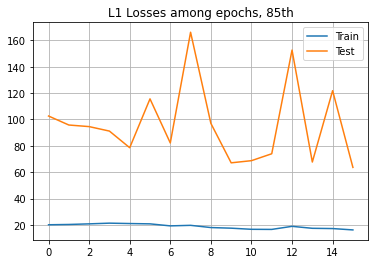

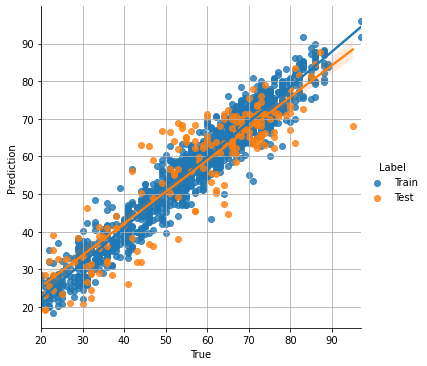

Saving ...
Epoch 87 / 100, BEST MAE 6.368
[train] 131.0 sec [valid] 15.9 sec 
[TRAIN]:: Loss=17.333 Mae=3.239 Rmse=3.948 Corr=0.967 
[TEST ]:: Loss=67.138 Mae=6.578 Rmse=8.050 Corr=0.888 
Epoch 88 / 100, BEST MAE 6.368
[train] 129.7 sec [valid] 15.7 sec 
[TRAIN]:: Loss=16.291 Mae=3.191 Rmse=3.820 Corr=0.969 
[TEST ]:: Loss=75.495 Mae=6.995 Rmse=8.586 Corr=0.886 
Epoch 89 / 100, BEST MAE 6.368
[train] 131.1 sec [valid] 15.6 sec 
[TRAIN]:: Loss=14.925 Mae=3.031 Rmse=3.623 Corr=0.971 
[TEST ]:: Loss=71.263 Mae=6.654 Rmse=8.355 Corr=0.889 
Epoch 90 / 100, BEST MAE 6.368
[train] 129.9 sec [valid] 15.5 sec 
[TRAIN]:: Loss=14.250 Mae=2.962 Rmse=3.566 Corr=0.973 
[TEST ]:: Loss=72.075 Mae=6.836 Rmse=8.383 Corr=0.886 
Epoch 91 / 100, BEST MAE 6.368
[train] 129.4 sec [valid] 15.5 sec 
[TRAIN]:: Loss=13.359 Mae=2.870 Rmse=3.470 Corr=0.975 
[TEST ]:: Loss=65.879 Mae=6.447 Rmse=8.002 Corr=0.889 


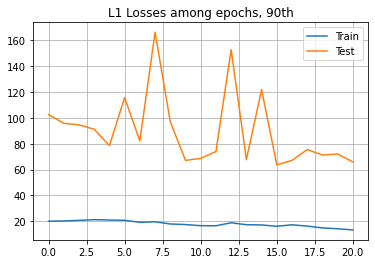

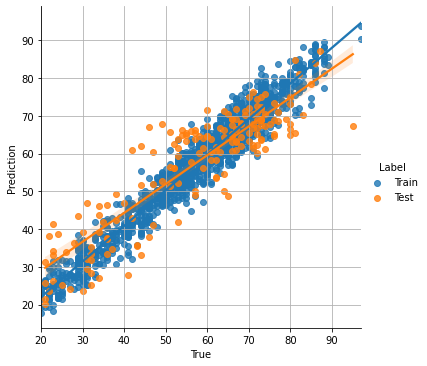

Saving ...
Epoch 92 / 100, BEST MAE 6.368
[train] 129.1 sec [valid] 15.8 sec 
[TRAIN]:: Loss=12.326 Mae=2.745 Rmse=3.296 Corr=0.977 
[TEST ]:: Loss=98.976 Mae=7.595 Rmse=9.898 Corr=0.853 
Epoch 93 / 100, BEST MAE 6.368
[train] 130.6 sec [valid] 15.9 sec 
[TRAIN]:: Loss=12.147 Mae=2.726 Rmse=3.292 Corr=0.977 
[TEST ]:: Loss=76.817 Mae=7.109 Rmse=8.624 Corr=0.884 
Epoch 94 / 100, BEST MAE 6.368
[train] 129.0 sec [valid] 15.5 sec 
[TRAIN]:: Loss=10.212 Mae=2.506 Rmse=3.020 Corr=0.981 
[TEST ]:: Loss=67.684 Mae=6.529 Rmse=8.134 Corr=0.887 
Epoch 95 / 100, BEST MAE 6.368
[train] 129.3 sec [valid] 15.6 sec 
[TRAIN]:: Loss=11.691 Mae=2.606 Rmse=3.254 Corr=0.978 
[TEST ]:: Loss=66.803 Mae=6.530 Rmse=8.068 Corr=0.889 
Epoch 96 / 100, BEST MAE 6.368
[train] 129.4 sec [valid] 15.6 sec 
[TRAIN]:: Loss=10.975 Mae=2.591 Rmse=3.122 Corr=0.979 
[TEST ]:: Loss=66.543 Mae=6.438 Rmse=8.037 Corr=0.888 


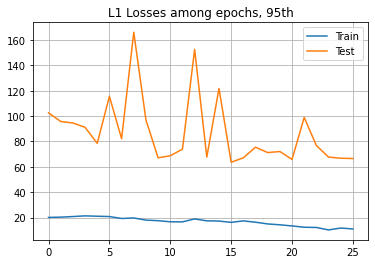

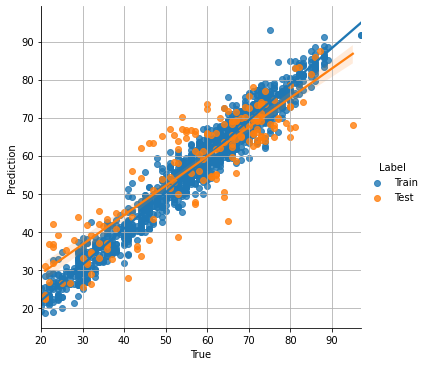

Saving ...
Epoch 97 / 100, BEST MAE 6.368
[train] 130.4 sec [valid] 15.6 sec 
[TRAIN]:: Loss=9.942 Mae=2.417 Rmse=2.996 Corr=0.981 
[TEST ]:: Loss=67.484 Mae=6.535 Rmse=8.075 Corr=0.887 
Epoch 98 / 100, BEST MAE 6.368
[train] 129.0 sec [valid] 15.6 sec 
[TRAIN]:: Loss=9.536 Mae=2.410 Rmse=2.952 Corr=0.982 
[TEST ]:: Loss=79.504 Mae=7.227 Rmse=8.762 Corr=0.878 
Epoch 99 / 100, BEST MAE 6.368
[train] 130.0 sec [valid] 15.5 sec 
[TRAIN]:: Loss=9.820 Mae=2.434 Rmse=3.009 Corr=0.981 
[TEST ]:: Loss=69.422 Mae=6.650 Rmse=8.180 Corr=0.893 
Epoch 100 / 100, BEST MAE 6.368
[train] 129.0 sec [valid] 15.5 sec 
[TRAIN]:: Loss=9.754 Mae=2.459 Rmse=2.998 Corr=0.982 
[TEST ]:: Loss=71.873 Mae=6.743 Rmse=8.335 Corr=0.881 
Saving ...


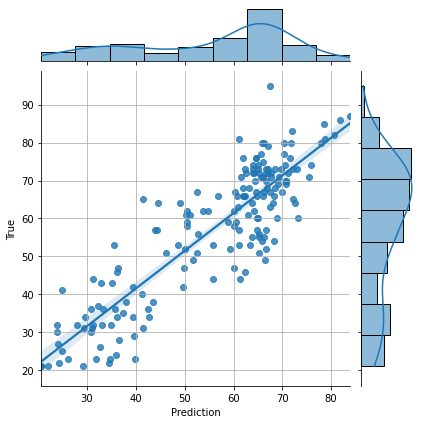

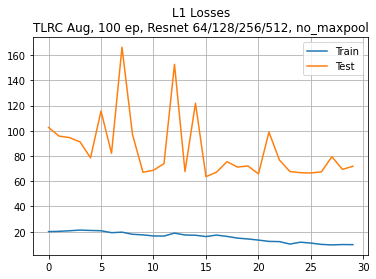

In [7]:
fold = None
# cfg.epochs = 200
e = 70
db = make_db(page, client=client, schema=cfg['notion']['no_fold_aug_schema'], title='Results') if cfg['notion']['use'] else None
for e in range(e, cfg.epochs):
    
    start_time = time.time()
    print(f'Epoch {e+1} / {cfg.epochs}, BEST MAE {cfg.best_mae:.3f}')
    
    model, trn_dp, trn_res = train(model, optimizer, fn_lst, trn_dp, cfg, fold=fold, augment=True)
    model, tst_dp, tst_res = valid(model, fn_lst, tst_dp, cfg, fold=fold)
    elapsed_time = round(time.time() - start_time, 3)
       
    if cfg.best_mae > tst_dp.mae[-1]:
        
        cfg.best_mae = tst_dp.mae[-1]
        model_name = f'{cfg.model_name}_ep{e}-{cfg.epochs}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=True)
        
    df = pd.concat([make_df(trn_res, 'Train'),
                    make_df(tst_res, 'Test')], ignore_index=True)
    
    trn_dp.corr.update(df[df['Label'] == 'Train'].corr().Prediction['True'])
    trn_dp.refresh()
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()

    if e % 1 == 0:
        trn_dp.info('train')
        tst_dp.info('test ')

    if e % cfg.verbose_period == 0:
        plt.title(f"L1 Losses among epochs, {e}th")
        plt.plot(list(trn_dp.loss), label='Train')
        plt.plot(list(tst_dp.loss), label='Test')
        plt.grid(); plt.legend()

        sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
        plt.grid()
        plt.show()
        
        model_name = f'{cfg.model_name}_ep{e}-{str(cfg.epochs).zfill(3)}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=False)
        
        if db:
            data = gather_data(e=e, time=elapsed_time, cfg=cfg,
                               train=trn_dp, valid=tst_dp)
            write_db(db, data)
    
    metrics = mlflow_data(time=elapsed_time, train=trn_dp, valid=tst_dp)
    mlflow.log_metrics(metrics, e)
    
    torch.cuda.empty_cache()
    
# Save Parameters to MLFlow
cfg.best_mae = min(tst_dp.mae)
cfg.refresh()
params = dict()
for name, value in cfg.get_dict().items():
    if name not in ['notion']:  
        params[name] = str(value)
mlflow.log_params(params)

save_checkpoint(cfg.get_dict(), 'cfg.pt', model_dir=f'./result/models/{run_date}/', is_best=True)

# Save Plots to MLFlow
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()
plt.savefig(f'./result/models/{run_date}/test_jointplot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/test_jointplot.png')
plt.close()

plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

mlflow.end_run()

### kFold

In [8]:
models  = []
packets = []
tst_dp = DataPacket()

#### Whole Run

In [9]:
# test_db = make_db(page, client=client, schema=cfg['notion']['test_schema'], title='Test') if cfg['notion']['use'] else None
test_db = page.children[2]
fold_db = make_db(page, client=client, schema=cfg['notion']['schema'], title=f'Fold {fold+1}') if cfg['notion']['use'] else None

In [ ]:
for fold in range(16, cfg.folds):
    
    print(f'Fold {fold+1} / {cfg.folds}')
    mlflow.start_run(run_name=f'{today()} Fold {fold+1}')
    mlflow.log_params(params)
    mlflow.set_tags({
        'fold': fold+1
    })

    model, dps, res = run(cfg, fold, fold_db, mlflow=mlflow)
    models.append(model)
    packets.append(dps)
    
    cfg.test = True
    model, tst_dp, tst_res = eval(model, fn_lst, tst_dp, cfg, fold=None)
    
    df = pd.concat([make_df(res[0], 'Train'),
                   make_df(res[1], 'Valid'),
                   make_df(tst_res, 'Test')], ignore_index=True)
    
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()
    
    # Show Holdout testset information
    tst_dp.info('Holdout test')
    sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()
    
    if test_db:
        data = gather_data(f=fold, test=tst_dp)
        write_db(test_db, data)
    
    torch.cuda.empty_cache()
    clear_output(wait=True)

## Inference

In [8]:
dset = DatasetPlus(cfg, augment=False, test=True)
dataloader = DataLoader(dset, batch_size=cfg.batch_size)

device = cfg.device
model.eval()
predictions, targets = [], []
with torch.no_grad():
    for i, (x, y) in enumerate(dataloader):
        
        x, y = x.to(device), y.to(device)
        y_pred = model.forward(x).to(device).squeeze()
        predictions.append(y_pred.cpu())
        targets.append(y.cpu())
torch.cuda.empty_cache()

predictions = torch.cat(predictions).detach().numpy()
targets = torch.cat(targets).detach().numpy()

In [15]:
results = pd.DataFrame([predictions, targets, dset.data_files], index=['predictions', 'targets', 'fname']).T

In [17]:
results['diff'] = results.targets - results.predictions

<AxesSubplot:>

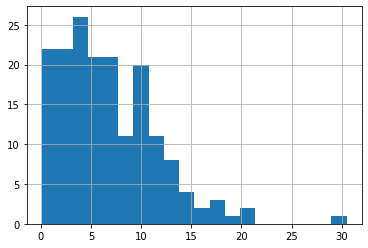

In [29]:
results['abs_diff'].hist(bins=20)

In [33]:
problematic = results[results['abs_diff'] > 10]

In [32]:
from utils.slice_viewer import *

In [36]:
sv = SliceViewer(problematic.iloc[0, 2])

In [ ]:
for fname in problematic.fname.values:
    
    SliceViewer(fname).triple_view()

## Ensemble

### Naive Averaging

In [39]:
# Ensemble
preds = dict()
models = glob('./models/ensembles/*.pth')
for fold, state in enumerate(models):
    
    model, device = load_model('resnet', verbose=False)
    model = torch.load(state)
    
    model, (_, _, _), tst_preds = eval(model, True, None, None, resize, device, batch_size,
                                      loss_fn, mae_fn, rmse_fn,
                                      [], [], [])
    
    preds[f'model_{fold}'] = list(map(float, tst_preds[1]))
    
ensemble_results = pd.DataFrame(preds)
ensemble_results['Avg'] = ensemble_results.mean(axis=1)
ensemble_results['True'] = list(map(float, tst_preds[0]))

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


In [64]:
def result_plot(df):
    
    avg = torch.Tensor(ensemble_results['Avg'])
    tru = torch.Tensor(ensemble_results['True'])
    
    corr = ensemble_results.corr()['True']['Avg']
    mae_fn, rmse_fn = nn.L1Loss(), RMSELoss()
    
    print(f'Ensemble Results')
    print(f'MAE  = {float(mae_fn(avg, tru)):.3f}')
    print(f'RMSE = {float(rmse_fn(avg, tru)):.3f}')
    print(f'CORR = {corr:.3f}')
    
    sns.lmplot(data=ensemble_results, x='True', y='Avg')
    plt.grid()
    plt.show()

Ensemble Results
MAE  = 7.025
RMSE = 8.598
CORR = 0.854


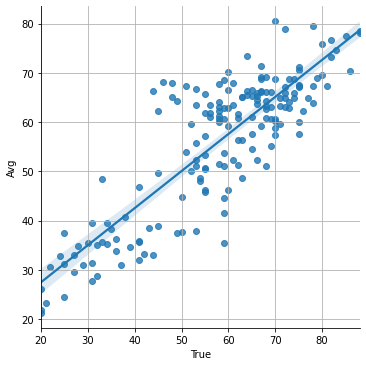

In [65]:
result_plot(ensemble_results)

### Blender

In [7]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

In [8]:
class CFG:
    
    model_name='resnet'
    dropout=0.1
    use_last_layer=True

In [10]:
class Ensemble(nn.Module):
    
    def __init__(self, model_list, CFG):
        super(Ensemble, self).__init__()
        
        self.cfg = CFG
        self.dropout = self.cfg.dropout
        self.models = dict()
        
        for idx, model_path in enumerate(model_list):
            
            model, device = load_model(self.cfg.model_name, verbose=False)
            model = torch.load(model_path)
            if not self.cfg.use_last_layer:
                model.fc = Identity()
                
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list) * 128, 128),
                    nn.Dropout(self.dropout),
                    nn.Linear(128, 1)
#                     nn.Dropout(self.dropout)
                )
                
            else:
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list), 1),
#                     nn.Dropout(self.dropout)
                )
                
            for param in model.parameters():
                param.requires_grad = False
                
            self.models[idx] = model
        
    def forward(self, x):
        
        vectors = list()
        for idx, model in self.models.items():
            vectors.append(model(x))
            
        x = torch.cat(vectors, dim=1)
        x = self.last_layer(x)
        
        return x

In [11]:
model_list = glob('./models/ensembles/rough/*.pth')
model_list.sort()
cfg = CFG()
cfg.use_last_layer = True
model = Ensemble(model_list, cfg).to(device)
with torch.no_grad():
    model.last_layer[0].weight.fill_(1 / len(model_list))
optimizer = optim.Adam(model.parameters(), lr=1e-4)

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


## SFCN Test

In [53]:
resnet, _ = load_model('resnet', verbose=True)

Model Resnet is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 48, 48]           2,352
       BatchNorm3d-2       [-1, 16, 96, 48, 48]              32
              ReLU-3       [-1, 16, 96, 48, 48]               0
         MaxPool3d-4       [-1, 16, 48, 24, 24]               0
            Conv3d-5       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-6       [-1, 16, 48, 24, 24]              32
              ReLU-7       [-1, 16, 48, 24, 24]               0
            Conv3d-8       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-9       [-1, 16, 48, 24, 24]              32
             ReLU-10       [-1, 16, 48, 24, 24]               0
       BasicBlock-11       [-1, 16, 48, 24, 24]               0
           Conv3d-12       [-1, 32, 24, 12, 12]          13,824
      BatchNorm3d-13       [-1, 32, 24, 12, 12]              64
             

In [119]:
cfg.model_name = 'sfcn'
model, cfg.device = load_model(cfg.model_name, verbose=False)
optimizer = optim.Adam(model.parameters(), lr=cfg.learning_rate)

Model Sfcn is selected.


In [120]:
state_dict = torch.load('../UKBiobank_deep_pretrain/brain_age/run_20190719_00_epoch_best_mae.p')
state_dict = dict(state_dict)
keys = list(map(lambda x: x.split('module.')[-1], state_dict.keys()))
state_dict = {k: v for k, v in zip(keys, state_dict.values())}
model.load_state_dict(state_dict)

<All keys matched successfully>

In [52]:
summary(model, input_size=(1, 160, 192, 160))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1    [-1, 32, 160, 192, 160]             896
       BatchNorm3d-2    [-1, 32, 160, 192, 160]              64
         MaxPool3d-3       [-1, 32, 80, 96, 80]               0
              ReLU-4       [-1, 32, 80, 96, 80]               0
            Conv3d-5       [-1, 64, 80, 96, 80]          55,360
       BatchNorm3d-6       [-1, 64, 80, 96, 80]             128
         MaxPool3d-7       [-1, 64, 40, 48, 40]               0
              ReLU-8       [-1, 64, 40, 48, 40]               0
            Conv3d-9      [-1, 128, 40, 48, 40]         221,312
      BatchNorm3d-10      [-1, 128, 40, 48, 40]             256
        MaxPool3d-11      [-1, 128, 20, 24, 20]               0
             ReLU-12      [-1, 128, 20, 24, 20]               0
           Conv3d-13      [-1, 256, 20, 24, 20]         884,992
      BatchNorm3d-14      [-1, 256, 20,

In [122]:
cfg.test = True
test_dset = MyDataset(cfg, augment=False, fold=None)
test_dl = DataLoader(test_dset, batch_size=16)

In [123]:
from tqdm import tqdm

In [124]:
mae = nn.L1Loss()

In [125]:
len(test_dl)

175

In [141]:
model.to(cfg.device)
model.eval()
y_preds, ys = [], []
age_bins = torch.tensor([42+i for i in range(40)])
with torch.no_grad(): # to not give loads on GPU... :(
    for i, (x, y) in tqdm(enumerate(test_dl)):

        x, y = F.interpolate(x, size=(160, 192, 160)).to(cfg.device), y.to(cfg.device)

        y_pred = model.forward(x)[0].to(cfg.device)
        y_pred = (np.exp(y_pred.squeeze().cpu()) * age_bins).sum()
#         y_pred = y_pred.max(axis=1).indices.squeeze()
#         y_pred += 42
        y_preds.append(y_pred)
        ys.append(y.squeeze())
#             loss = mae(y_pred, y.squeeze())


torch.cuda.empty_cache()

175it [01:34,  1.85it/s]
